Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [ ]:
NAME = "ROBERT FOURNIER"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [ ]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
%pip install quandl
import quandl
quandl.ApiConfig.api_key = "YOUR_API_KEY"

In [ ]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2013, 11, 12)
end = datetime.datetime(2018, 11, 12)

### Option 2 - Using Yahoo Finance `yfinance` library

In [ ]:
%pip install yfinance
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# 2) Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB', 'MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%***********************]  4 of 4 completed


In [ ]:
## TYPE YOUE CODE BELOW

## Part 2 - Adjusted Close for the Past 2 Months

In [ ]:
# Grab the adjusted close for the last 60 months
# 60 months = 5 years = 365 * 5 days
days_in_5_years = 365 * 5

# Use pandas dataframe to get the last 5 years adjusted close
last_60_days_adj_close = all_stocks.loc[datetime.date.today() - datetime.timedelta(days=days_in_5_years):, 'Adj Close']
last_60_days_adj_close.head()

,AMZN,FB,IBM,MMM
Date,,,,
2016-03-28,579.869995,113.690002,119.002792,143.614777
2016-03-29,593.859985,116.139999,119.748558,141.982361
2016-03-30,598.690002,114.699997,119.010818,144.020706
2016-03-31,593.640015,114.099998,121.448616,143.917099
2016-04-01,598.500000,116.059998,122.306641,144.694427


## Part 3 - Resampled to Monthly

In [ ]:
# Use the asfrequency method to resample to monthly adjusted close data
last_60_months_adj_close = last_60_days_adj_close.asfreq("M", method='pad')
last_60_months_adj_close.head()

,AMZN,FB,IBM,MMM
Date,,,,
2016-03-31,593.640015,114.099998,121.448616,143.917099
2016-04-30,659.590027,117.580002,117.030098,144.564835
2016-05-31,722.789978,118.809998,124.474747,146.344696
2016-06-30,715.619995,114.279999,122.887802,152.256943
2016-07-31,758.809998,123.940002,130.045120,155.073929


## Part 4 - Autocorrelation of Month End Adjusted Close

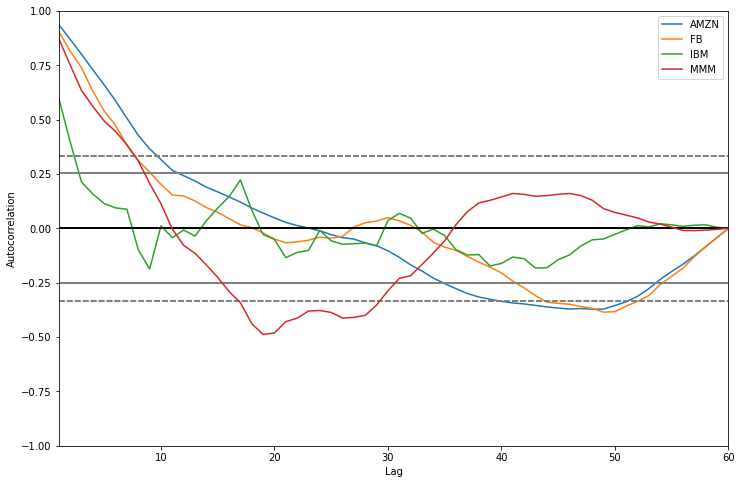

In [ ]:
# Set a slightly bigger plot for viewing convenience
plt.figure(figsize=(12,8))

# Run a simple for loop to iterate through each stock
for stock in last_60_months_adj_close.columns:
  # For each stock, plot the autocorrelation plot
  pd.plotting.autocorrelation_plot(last_60_months_adj_close.loc[:, stock], 
                                   label=stock)

The autocorrelation plot above displays that monthly adjusted closes are mininimally correlated. IBM is barely correlated, but AMZN, FB and MMM are statistically significantly correlated for a lag of 10 months. Afterwards, AMZN and FB are largely not statistically significantly autocorrelated. However, MMM remains negatively autocorrelated at a significant margin 20 to 30 months in lag. 

## Part 5 - Monthly Returns and Autocorrelation

In [ ]:
# First creating a python function to determine the monthly return

def monthly_return(stock_data, _stock):
  '''
  A function to return the monthly return of a stock, calculated as adjusted
  close on last day of month divided by adjusted close on last day of previous
  month. 
  '''
  # Isolate the specific timeseries for the specific stock inputted
  specific_stock_series = stock_data.loc[:, _stock]

  # Return the monthly return for the specific stock, calculated as the current
  # monthly adjusted close divided by the prior month's adjusted close
  return specific_stock_series / specific_stock_series.shift(-1)


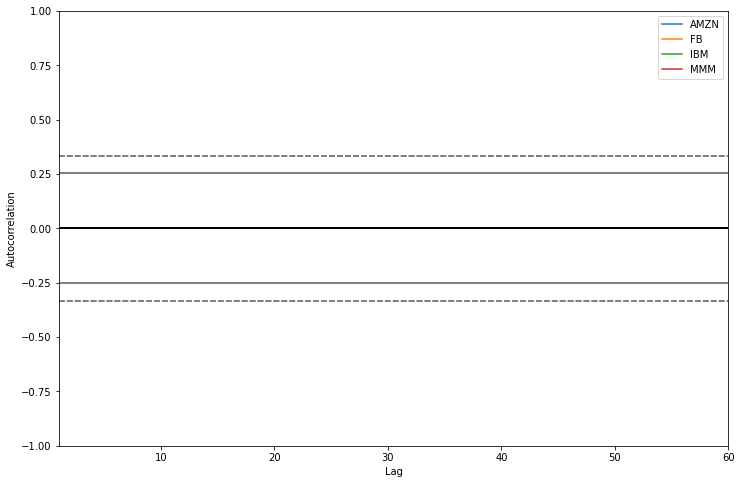

In [ ]:
# Making the plot slightly larger again
plt.figure(figsize=(12,8))

# A simple for loop again to consider each stock
for stock in last_60_months_adj_close.columns:
  # Now we're plotting the monthly return output
  pd.plotting.autocorrelation_plot(monthly_return(last_60_months_adj_close, stock),
                                   label=stock)

This autocorrelation plot shows that there is no statistically significant autocorrelation of any stock's monthly returns. This is to be expected given domain knowledge of monthly returns.

## Part 5 - Scatter Matrix of Monthly Returns

In [ ]:
# We'll use a dictionary of stock values and their timeseries to create the 
# new pandas dataframe.

# First, initializing an empty dictionary
new_df_dict = {}

# Simple for loop to update the dictionary with each stock and it's monthly
# return as per the function defined above
for stock in last_60_months_adj_close.columns:
  new_df_dict.update({stock: monthly_return(last_60_months_adj_close, stock)})

# Initialize the pandas dataframe with the dictionary
last_60_months_monthly_returns = pd.DataFrame.from_dict(new_df_dict)

last_60_months_monthly_returns.head()

,AMZN,FB,IBM,MMM
Date,,,,
2016-03-31,0.900014,0.970403,1.037755,0.995519
2016-04-30,0.912561,0.989647,0.940191,0.987838
2016-05-31,1.010019,1.039639,1.012914,0.961169
2016-06-30,0.943082,0.922059,0.944963,0.981835
2016-07-31,0.986544,0.982715,1.002296,0.988928


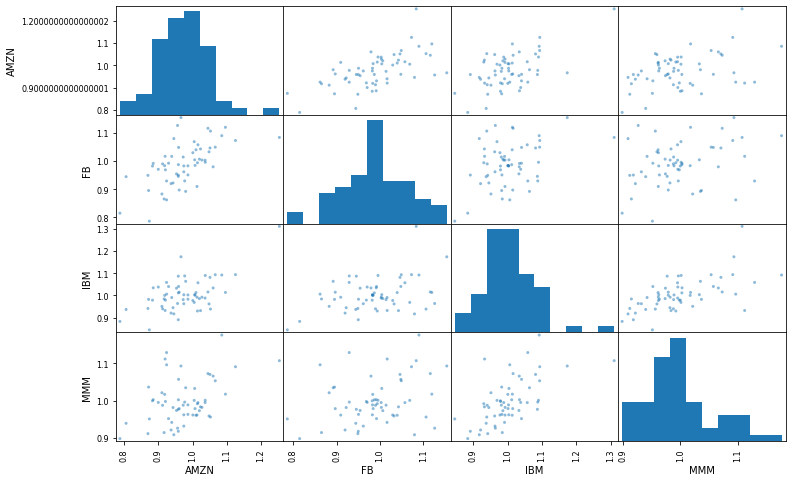

In [ ]:
# Plot the scatter matrix of the dataframe
pd.plotting.scatter_matrix(last_60_months_monthly_returns, figsize=(12,8))
plt.show()

There appears to be some correlation between FB and AMAZN, and a separate correlation between IBM and MMM. Otherwse, there is no correlation between FB - MMM, FB - IBM, AMZN - MMM, AMZN - IBM. 